In [115]:
import matplotlib.pyplot as plt
import os

In [116]:
root_dir_rmse = 'D:\\Luis_Mercado\\Google Business\\Shared Folder\\Thesis 1\\Experiment Results\\rmse'
root_dir_plcc = 'D:\\Luis_Mercado\\Google Business\\Shared Folder\\Thesis 1\\Experiment Results\\plcc'

models = ['direct_v4', 'recurrent_singleton_v2', 'nbr_singleton_v2', 'randomforest_singleton_v2',
          'sgb_singleton_v2', 'ensemble_singleton_v2']
model_names = ['Direct SVR', 'Recurrent SVR', 'K-Nearest Neighbors Regression', 'Random Forest Regression', 
                'Stochastic Gradient Boosting', 'Stacking Ensemble']

plcc_files = ['plcc_{}.txt'.format(model) for model in models]
rmse_files = ['rmse_{}.txt'.format(model) for model in models]

plcc_dict = {}
rmse_dict = {}

for idx, plcc_file in enumerate(plcc_files):
    model_name = model_names[idx]
    file_path = os.path.join(root_dir_plcc, plcc_file)
    with open(file_path, mode='r', encoding='utf-8') as reader:
        current_apc = ''
        for line_read in reader:
            if 'PLCC for' in line_read:
                current_apc = line_read[:-1]
                if current_apc not in plcc_dict:
                    plcc_dict[current_apc] = {}
                if model_name not in plcc_dict[current_apc]:
                    plcc_dict[current_apc][model_name] = []
            else:
                time_step, plcc_point = line_read.split(':')
                time_step = int(time_step[8:-1])
                plcc_point = float(plcc_point.split(',')[0].strip()[1:])
                point = (time_step, plcc_point)
                plcc_dict[current_apc][model_name].append(point)
                
for idx, rmse_file in enumerate(rmse_files):
    model_name = model_names[idx]
    file_path = os.path.join(root_dir_rmse, rmse_file)
    with open(file_path, mode='r', encoding='utf-8') as reader:
        current_apc = ''
        for line_read in reader:
            if 'RMSE for' in line_read:
                current_apc = line_read[:-1]
                if current_apc not in rmse_dict:
                    rmse_dict[current_apc] = {}
                if model_name not in rmse_dict[current_apc]:
                    rmse_dict[current_apc][model_name] = []
            else:
                time_step, rmse_point = line_read.split(':')
                time_step = int(time_step[8:-1])
                rmse_point = float(rmse_point.split(',')[0].strip())
                point = (time_step, rmse_point)
                rmse_dict[current_apc][model_name].append(point)

# PLCC (excluding ensemble)

In [119]:
apc_names = list(plcc_dict.keys())
excludes = ['Stacking Ensemble']
def plot_plcc(name, exclude=None, plot_absolute=True):
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.title(name)
    plt.xlabel('Time (in hours)')
    plt.ylabel('PLCC (higher is better)')
    if exclude is None:
        exclude = list()
    for model_name, plcc_points in plcc_dict[name].items():
        if model_name in exclude:
            continue
        x_points = [point[0] for point in plcc_points]
        if plot_absolute:
            y_points = [abs(point[1]) for point in plcc_points]
        else:
            y_points = [point[1] for point in plcc_points]
        plt.plot(x_points, y_points, '-^', linewidth=2, label=model_name, ms=10)
    plt.legend(loc='upper right')

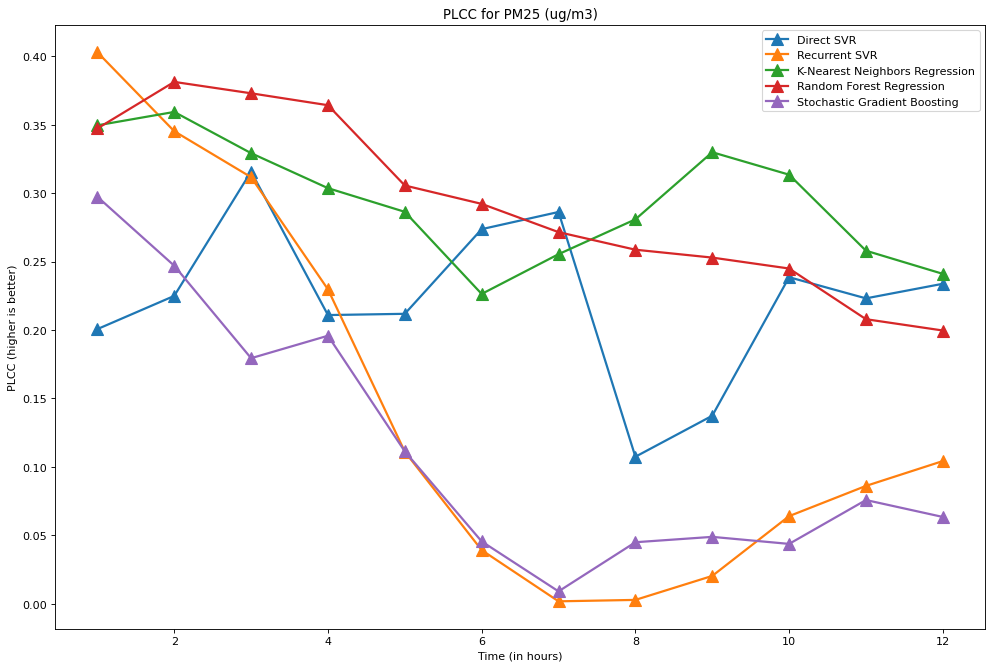

In [120]:
apc_name = apc_names[0]
plot_plcc(apc_name, excludes)

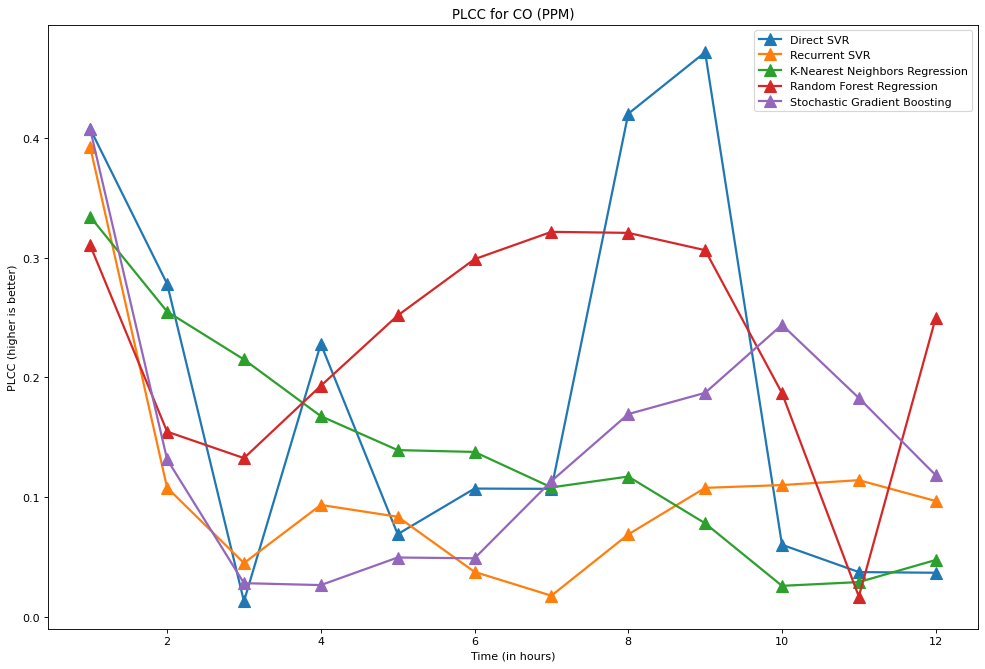

In [121]:
apc_name = apc_names[1]
plot_plcc(apc_name, excludes)

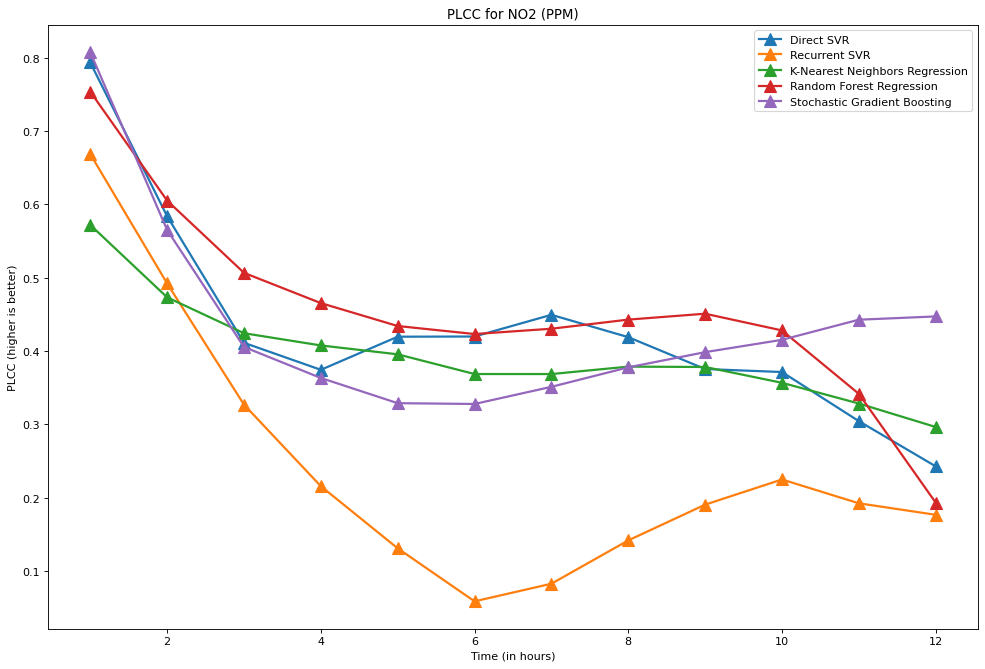

In [122]:
apc_name = apc_names[2]
plot_plcc(apc_name, excludes)

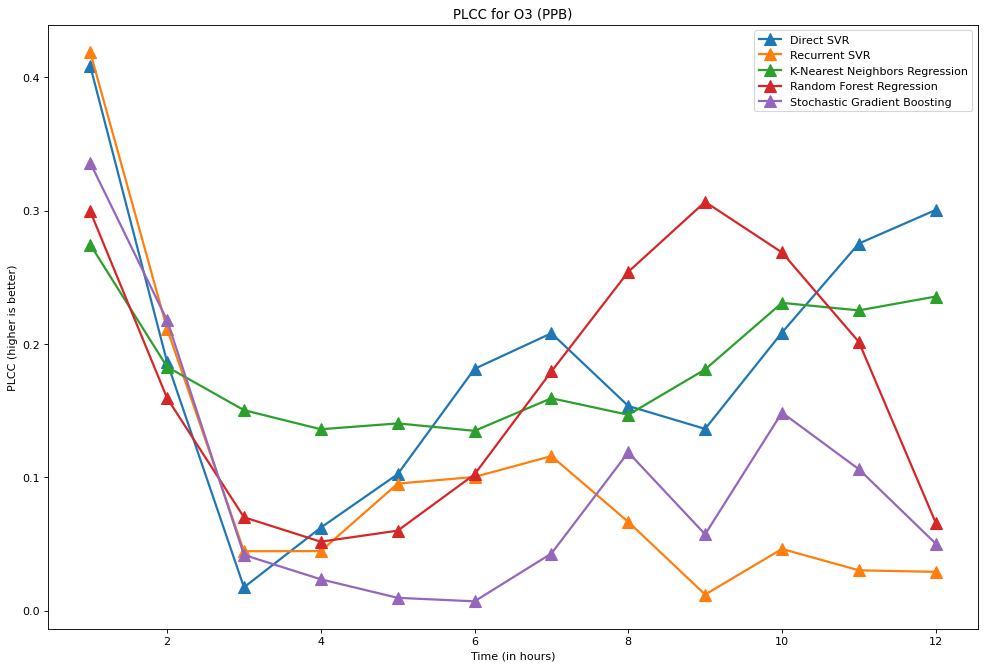

In [123]:
apc_name = apc_names[3]
plot_plcc(apc_name, excludes)

# RMSE (excluding ensemble)

In [127]:
apc_names = list(rmse_dict.keys())
excludes = ['Stacking Ensemble']
def plot_rmse(name, exclude=None):
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.title(name)
    plt.xlabel('Time (in hours)')
    plt.ylabel('RMSE (lower is better)')
    if exclude is None:
        exclude = list()
    for model_name, rmse_points in rmse_dict[name].items():
        if model_name in exclude:
            continue
        x_points = [point[0] for point in rmse_points]
        y_points = [point[1] for point in rmse_points]
        plt.plot(x_points, y_points, '-^', linewidth=2, label=model_name, ms=10)
    plt.legend(loc='upper right')

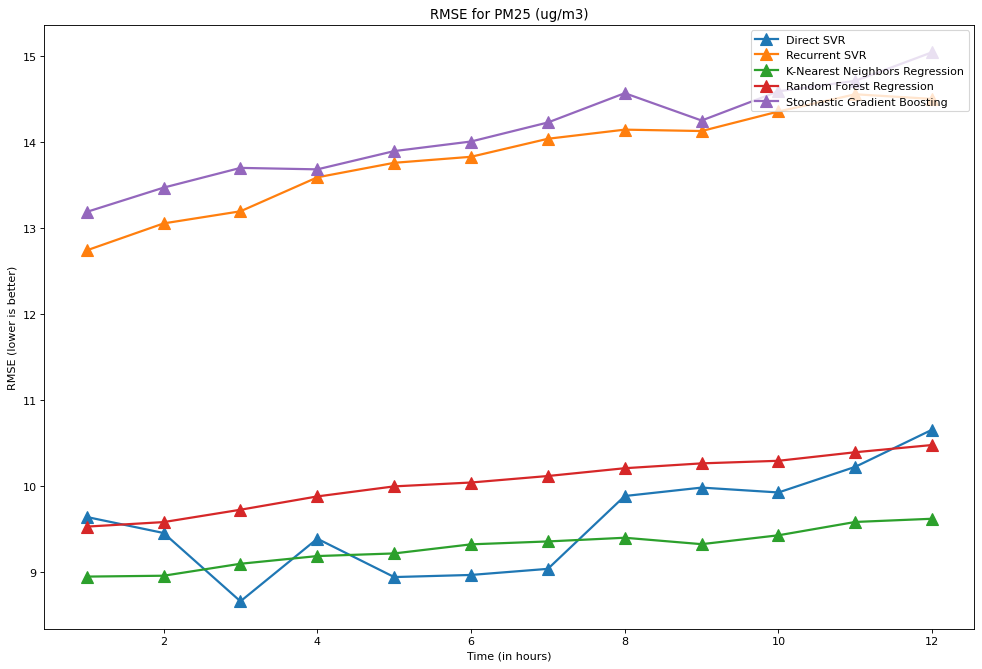

In [128]:
apc_name = apc_names[0]
plot_rmse(apc_name,excludes)

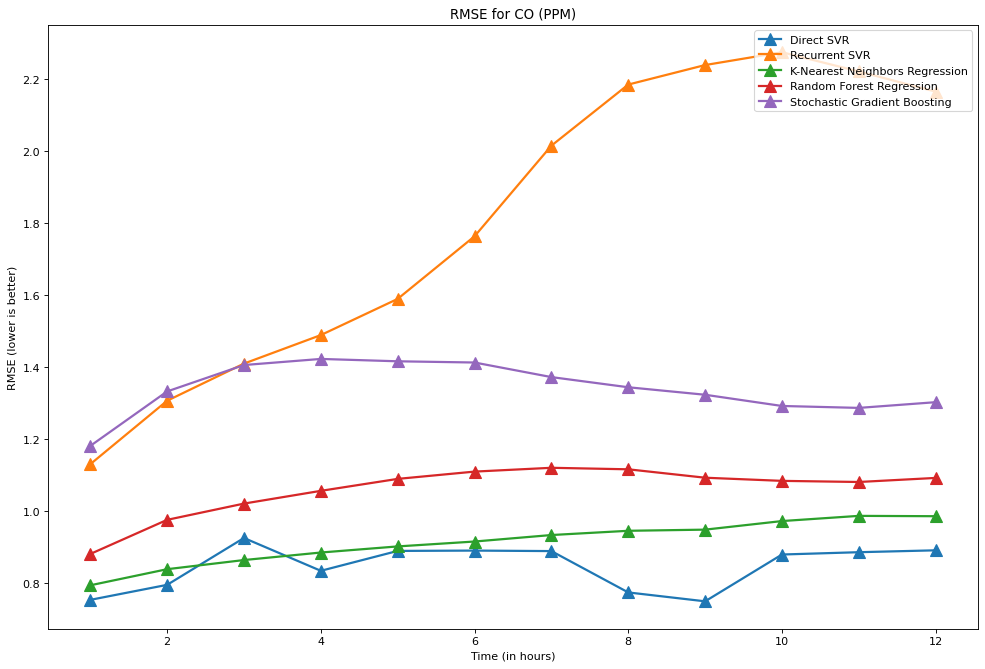

In [129]:
apc_name = apc_names[1]
plot_rmse(apc_name, excludes)

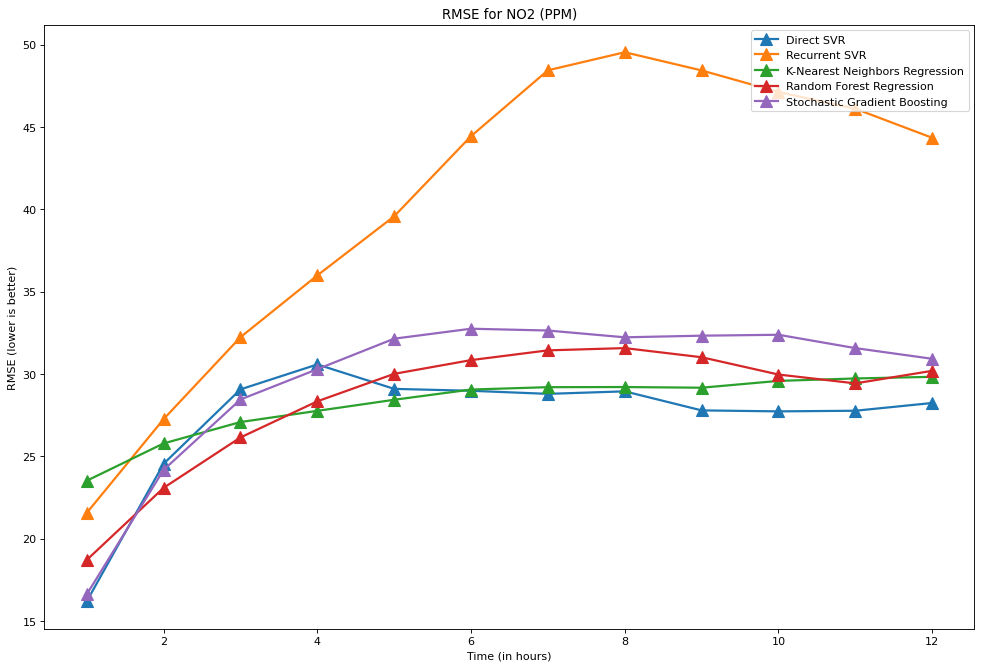

In [130]:
apc_name = apc_names[2]
plot_rmse(apc_name, excludes)

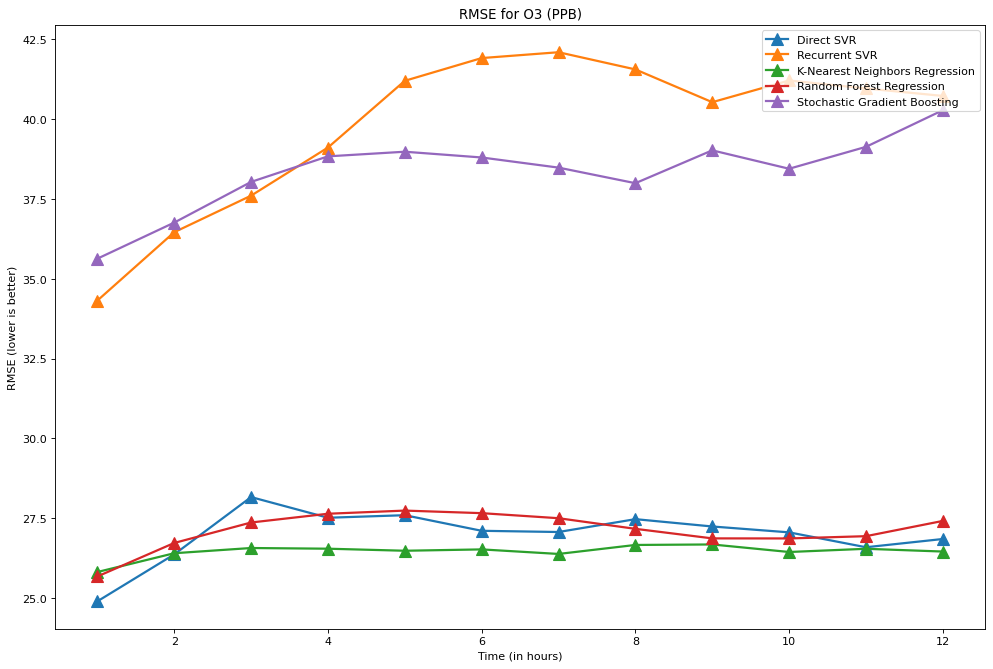

In [131]:
apc_name = apc_names[3]
plot_rmse(apc_name, excludes)

# Ensemble vs Recurrent vs Direct

In [132]:
apc_names = list(plcc_dict.keys())
exclude_cols = ['K-Nearest Neighbors Regression', 'Random Forest Regression', 
               'Stochastic Gradient Boosting']

## PLCC

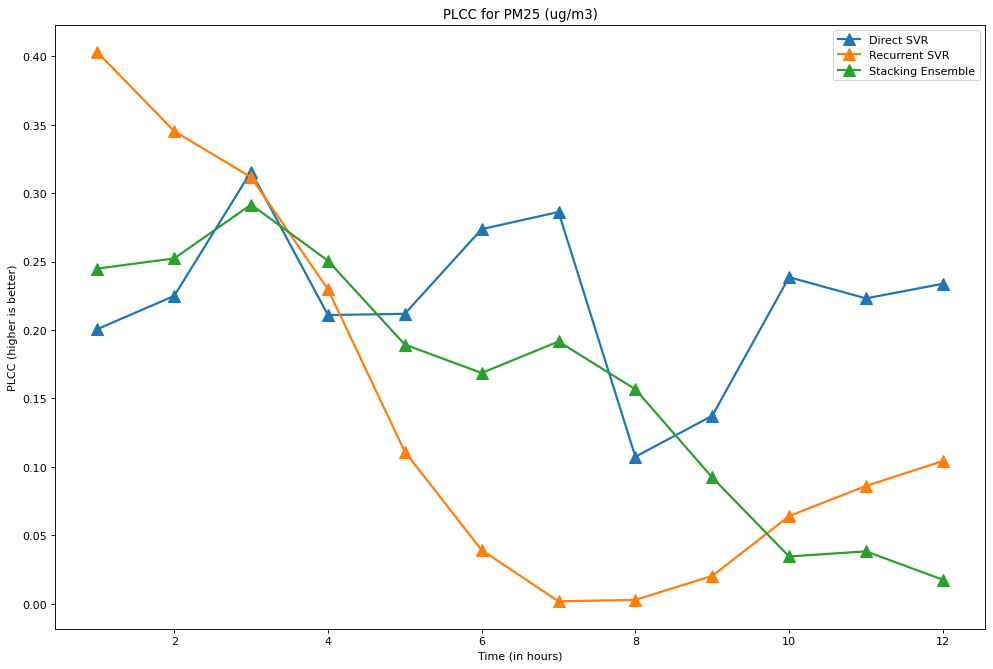

In [133]:
apc_name = apc_names[0]
plot_plcc(apc_name, exclude_cols)

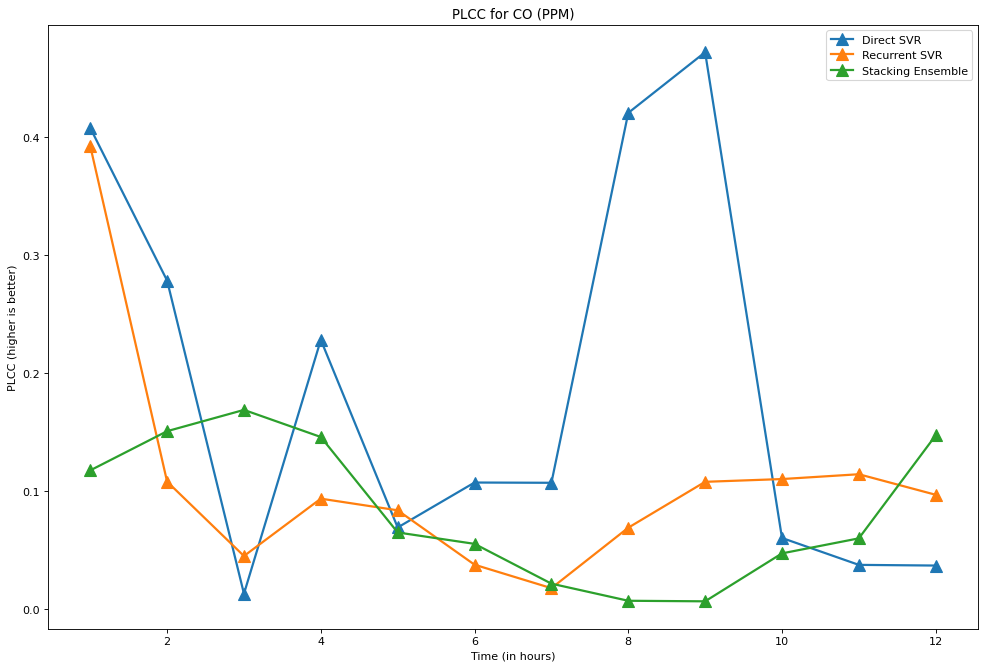

In [134]:
apc_name = apc_names[1]
plot_plcc(apc_name, exclude_cols)

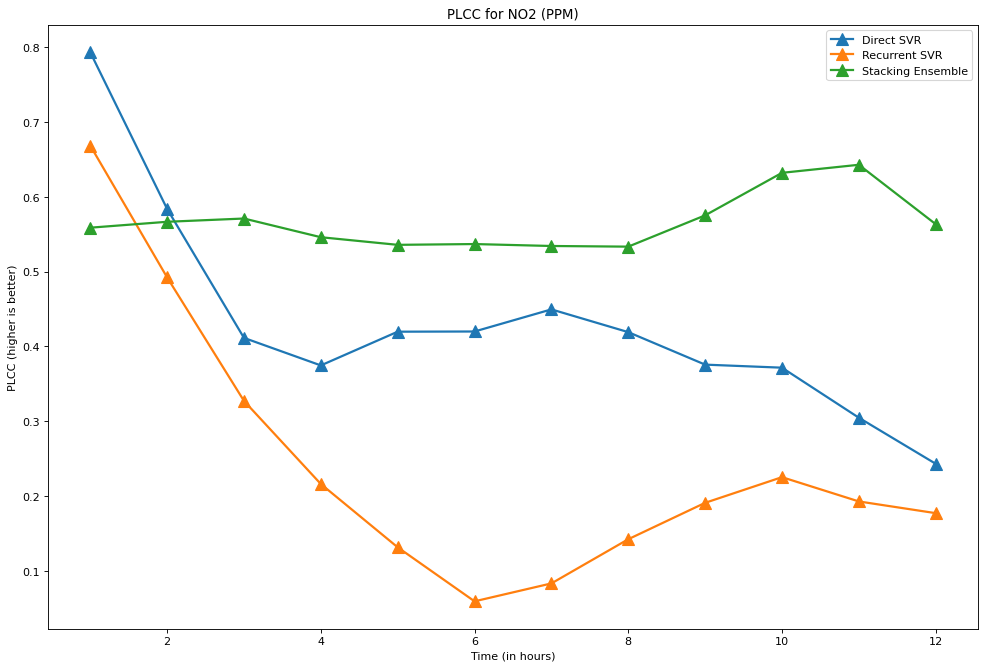

In [135]:
apc_name = apc_names[2]
plot_plcc(apc_name, exclude_cols)

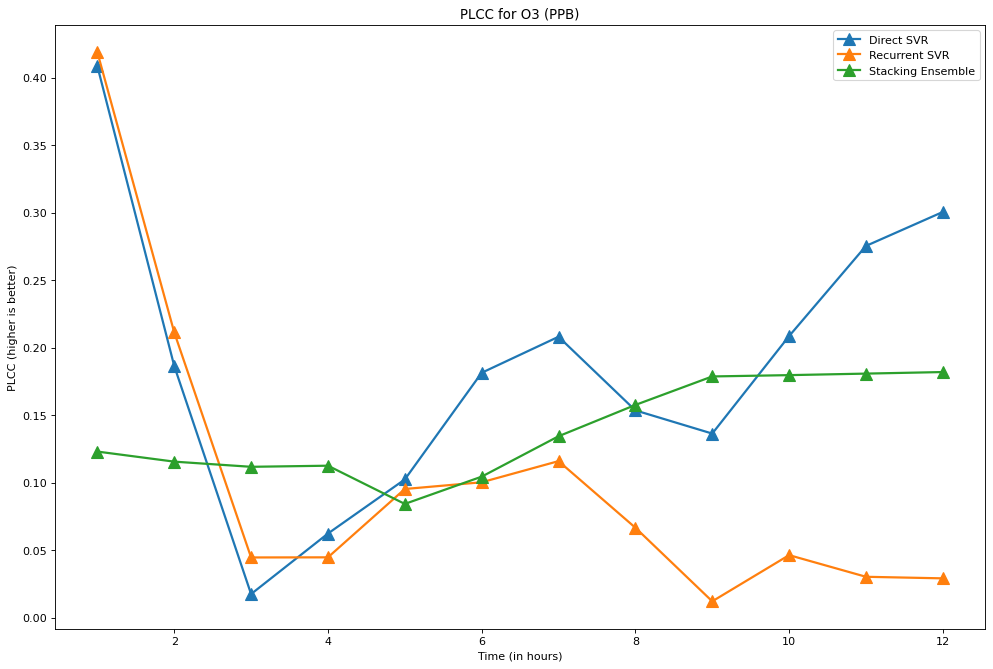

In [136]:
apc_name = apc_names[3]
plot_plcc(apc_name, exclude_cols)

## RMSE

In [137]:
apc_names = list(rmse_dict.keys())

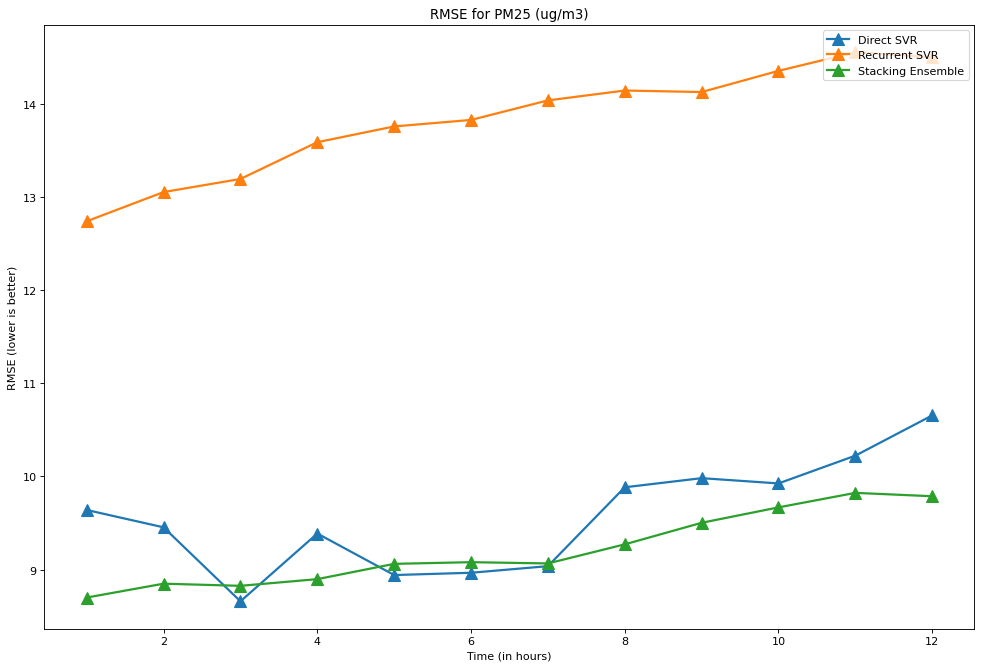

In [138]:
apc_name = apc_names[0]
plot_rmse(apc_name, exclude_cols)

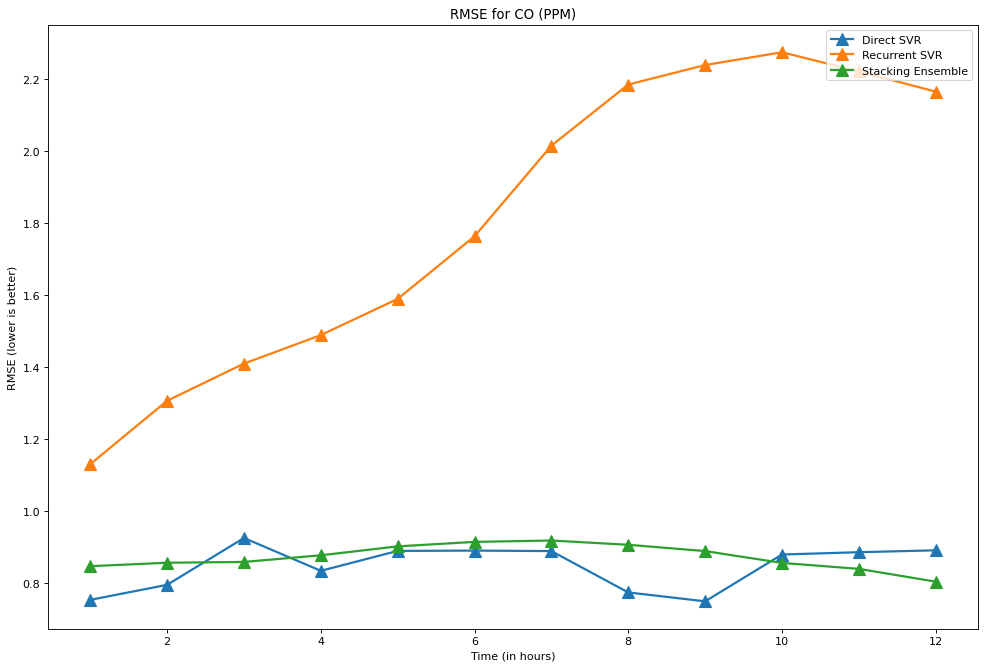

In [139]:
apc_name = apc_names[1]
plot_rmse(apc_name, exclude_cols)

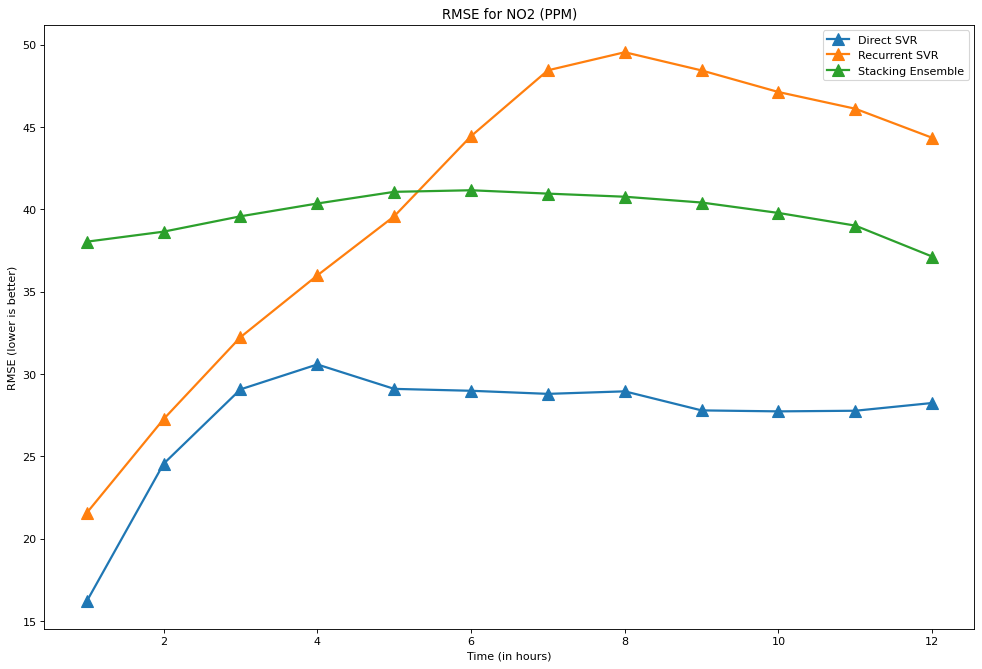

In [140]:
apc_name = apc_names[2]
plot_rmse(apc_name, exclude_cols)

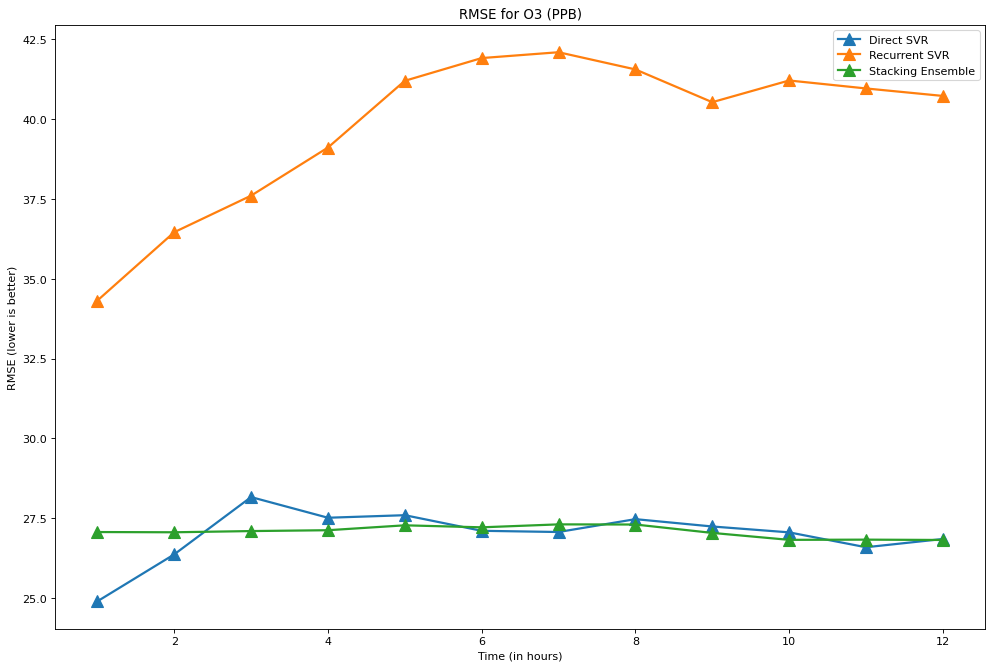

In [141]:
apc_name = apc_names[3]
plot_rmse(apc_name, exclude_cols)

# Recurrent vs Ensemble

In [142]:
apc_names = list(plcc_dict.keys())
exclude_cols = ['Direct SVR', 'K-Nearest Neighbors Regression', 'Random Forest Regression', 
                'Stochastic Gradient Boosting']

## PLCC

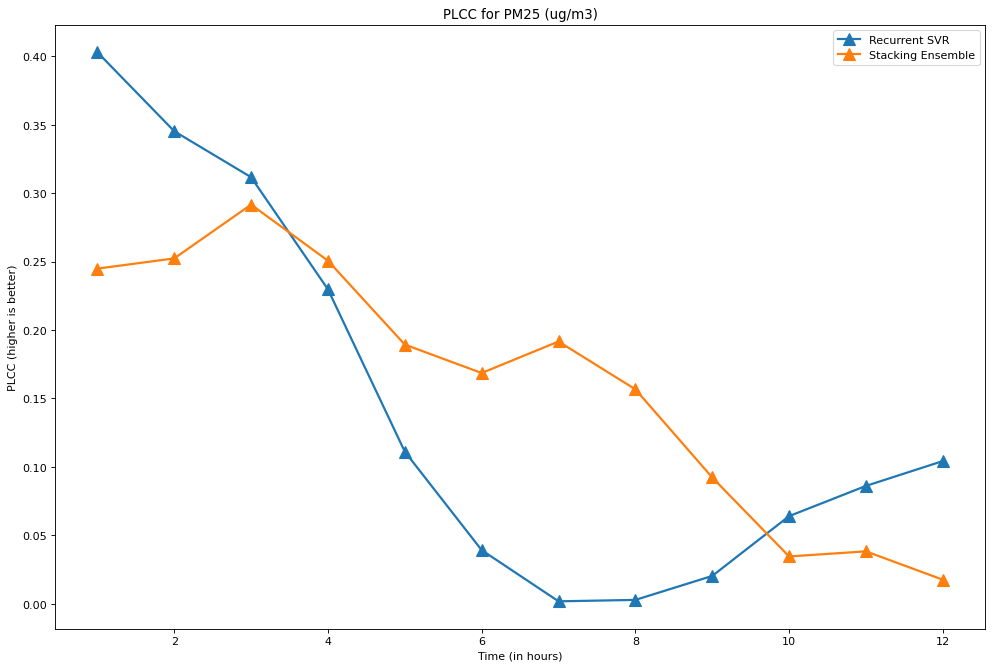

In [143]:
apc_name = apc_names[0]
plot_plcc(apc_name, exclude_cols)

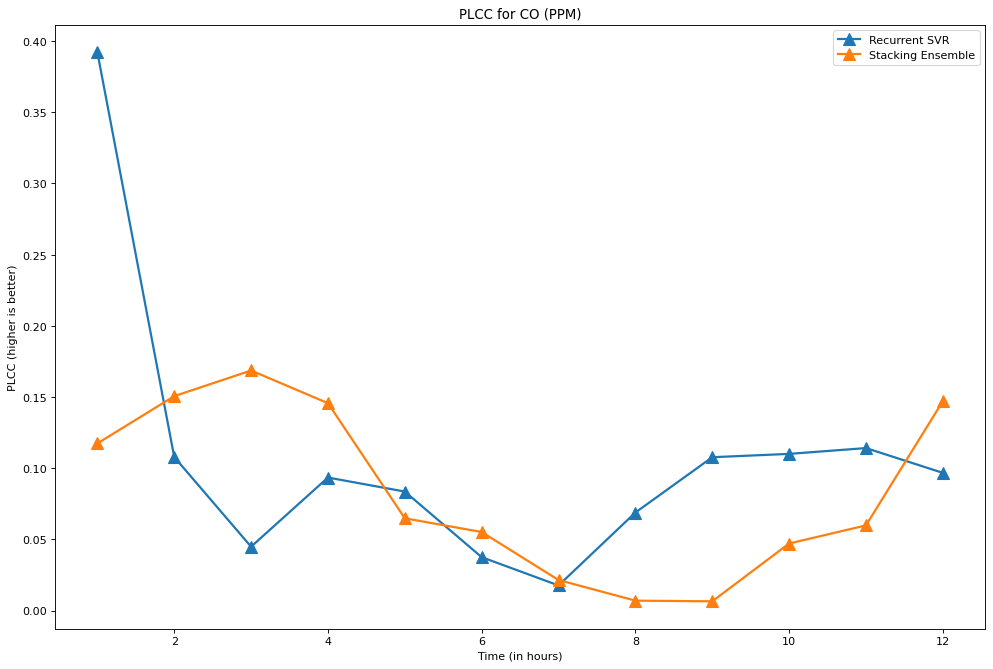

In [144]:
apc_name = apc_names[1]
plot_plcc(apc_name, exclude_cols)

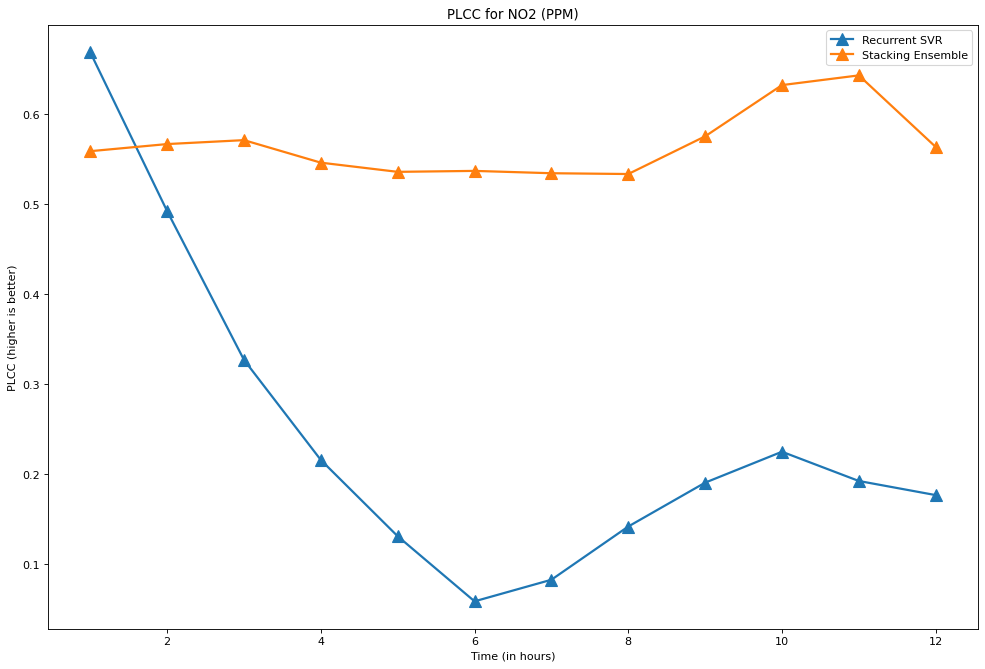

In [145]:
apc_name = apc_names[2]
plot_plcc(apc_name, exclude_cols)

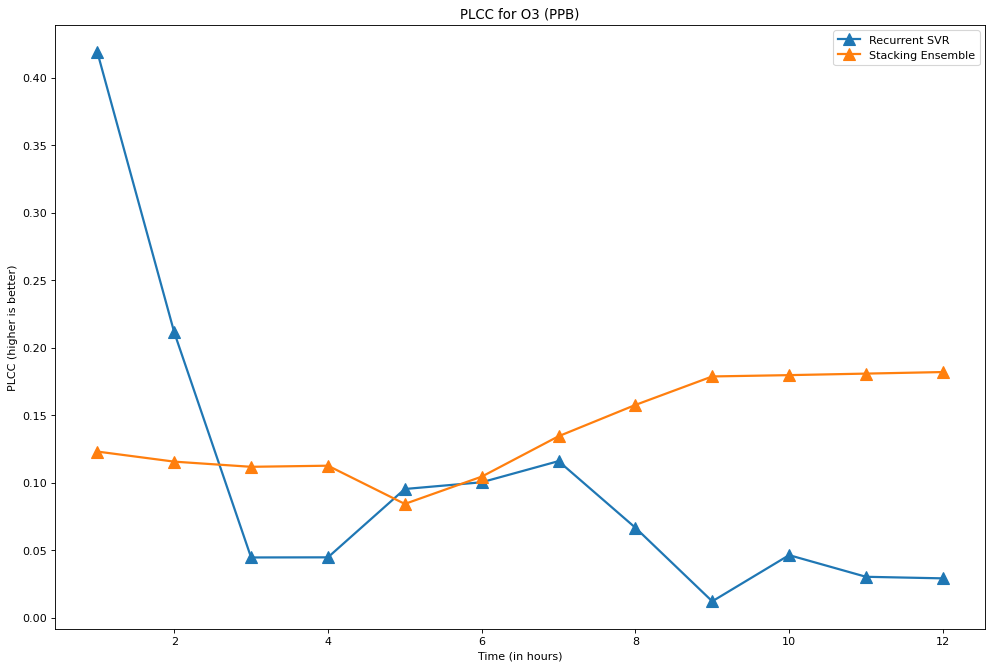

In [146]:
apc_name = apc_names[3]
plot_plcc(apc_name, exclude_cols)

## RMSE

In [147]:
apc_names = list(rmse_dict.keys())

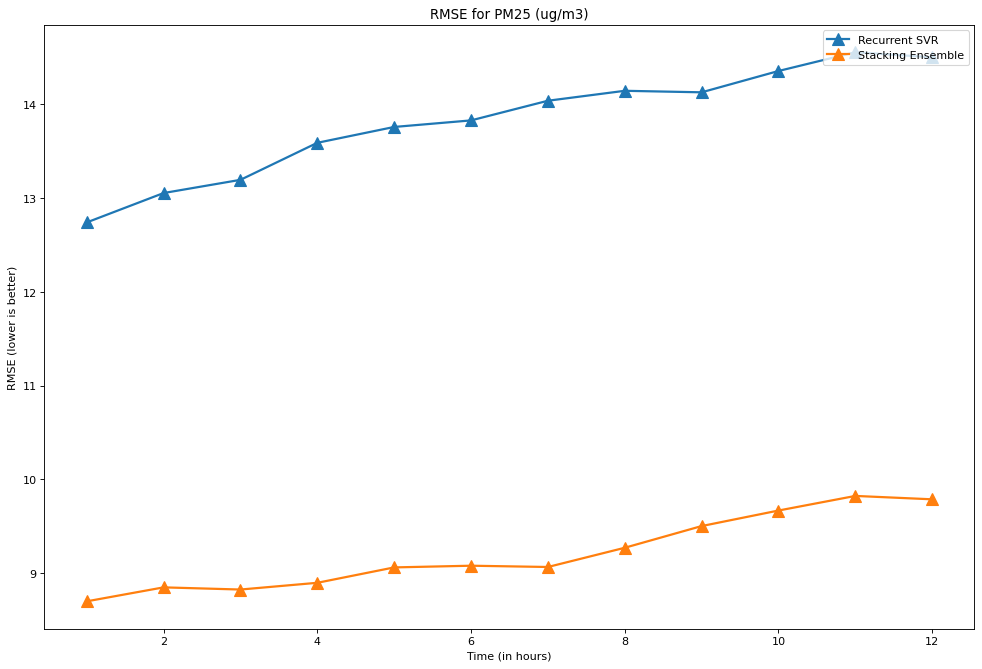

In [148]:
apc_name = apc_names[0]
plot_rmse(apc_name, exclude_cols)

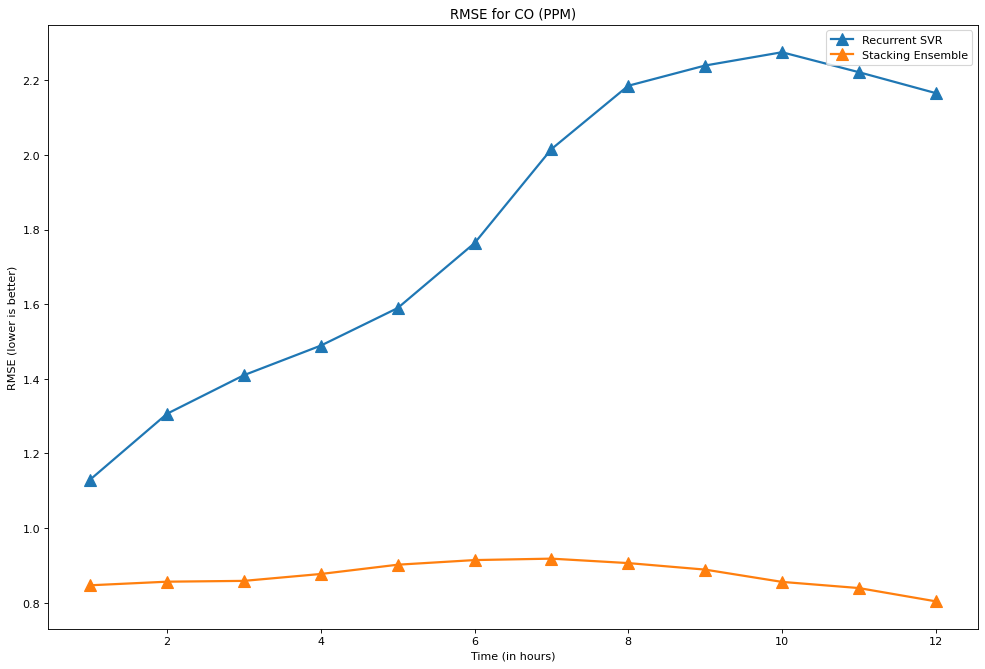

In [149]:
apc_name = apc_names[1]
plot_rmse(apc_name, exclude_cols)

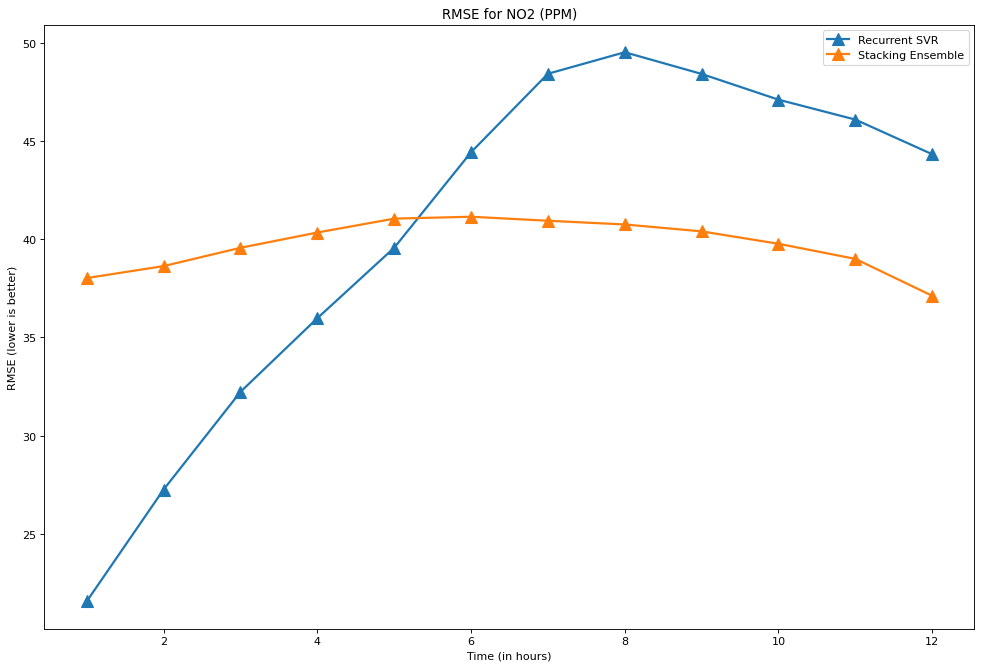

In [150]:
apc_name = apc_names[2]
plot_rmse(apc_name, exclude_cols)

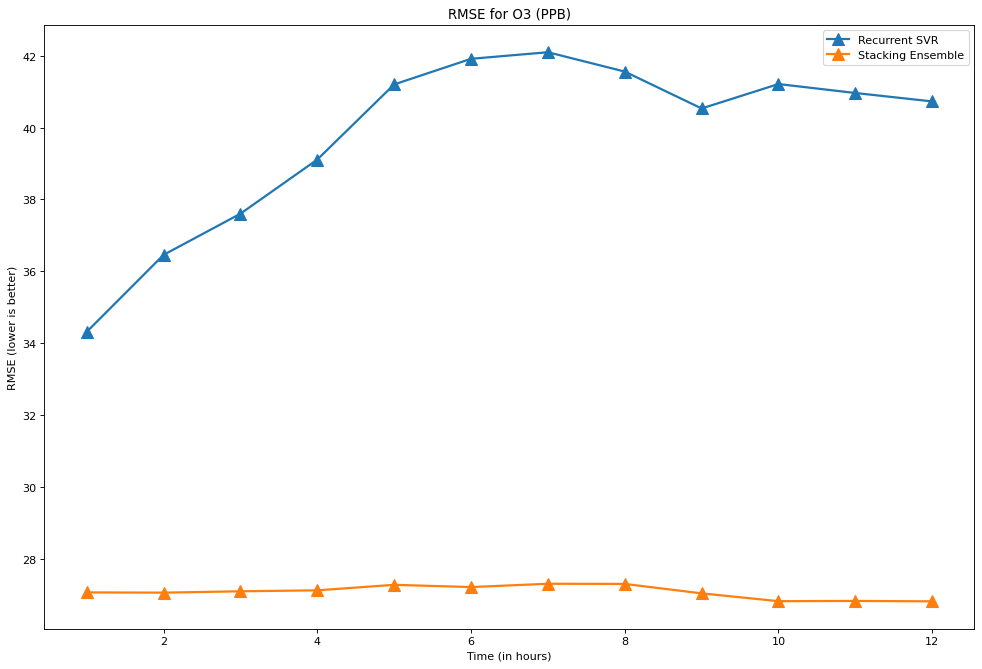

In [151]:
apc_name = apc_names[3]
plot_rmse(apc_name, exclude_cols)

# Plot everything

## PLCC

In [152]:
apc_names = list(plcc_dict.keys())

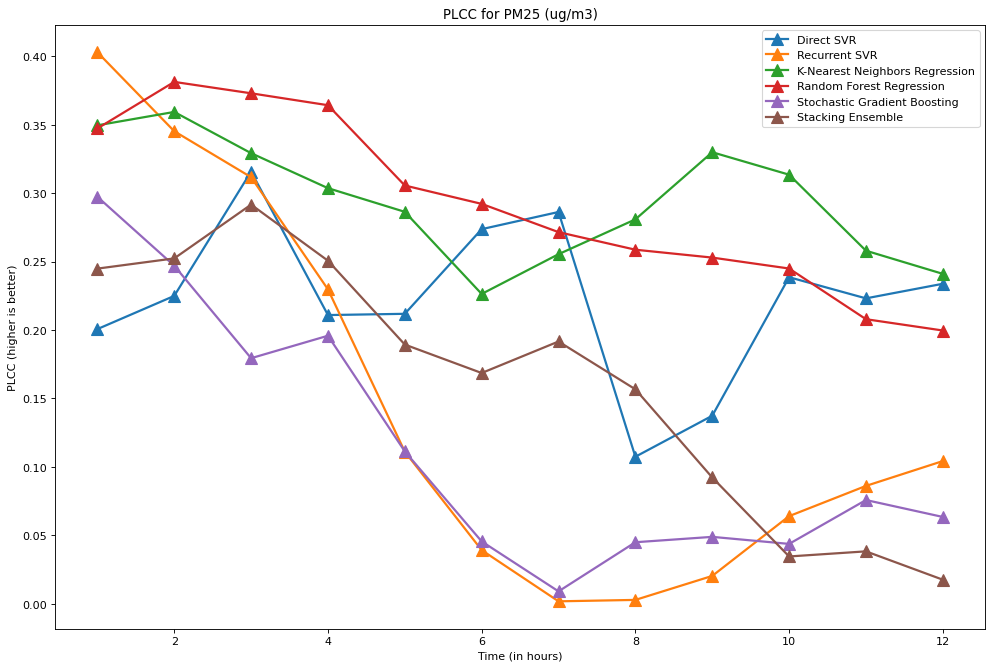

In [153]:
apc_name = apc_names[0]
plot_plcc(apc_name)

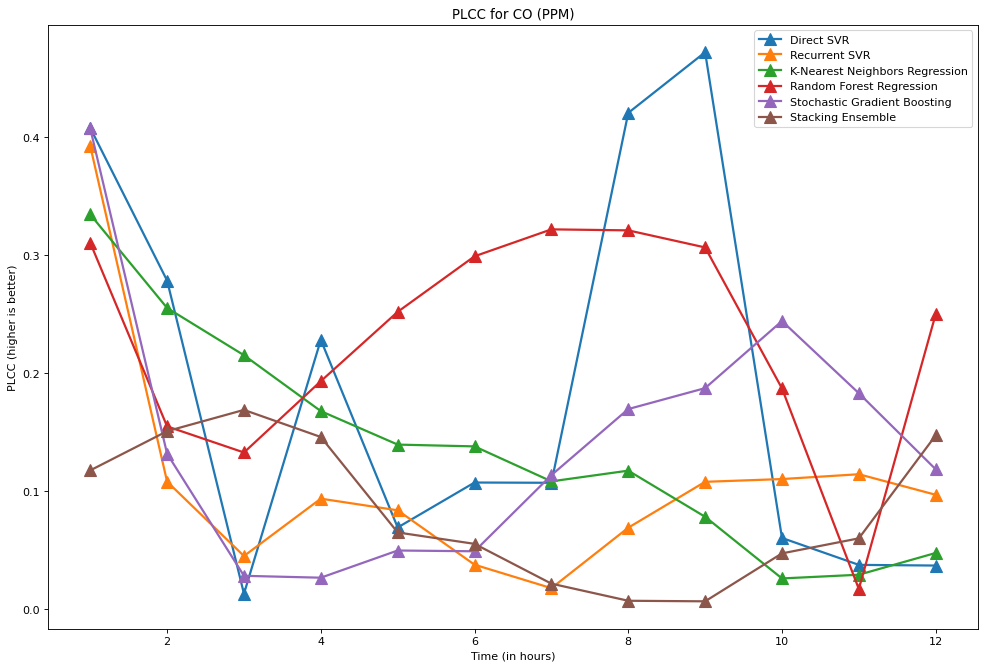

In [154]:
apc_name = apc_names[1]
plot_plcc(apc_name)

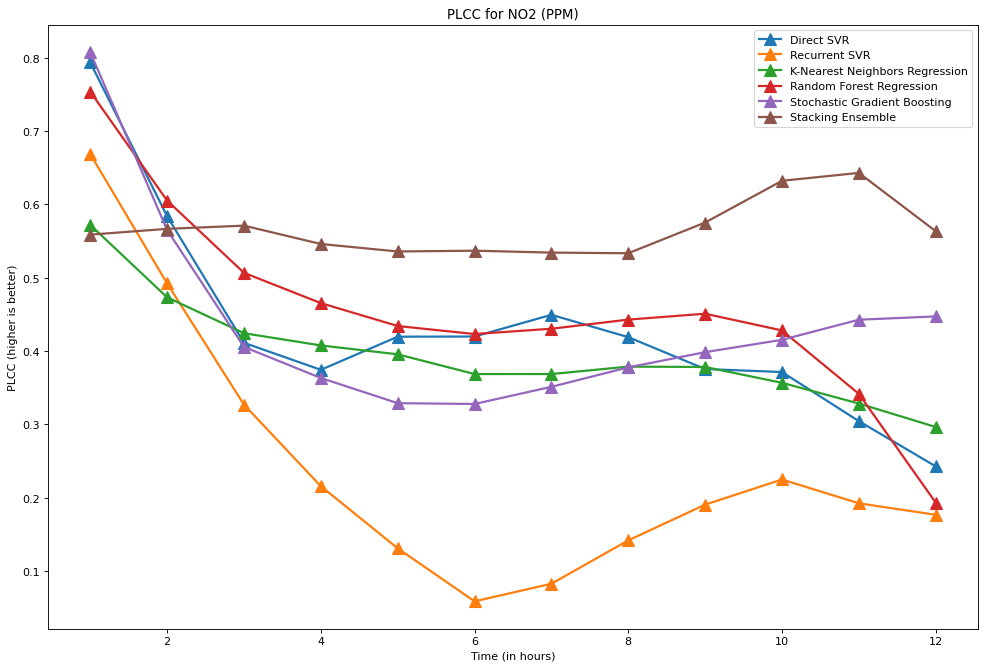

In [155]:
apc_name = apc_names[2]
plot_plcc(apc_name)

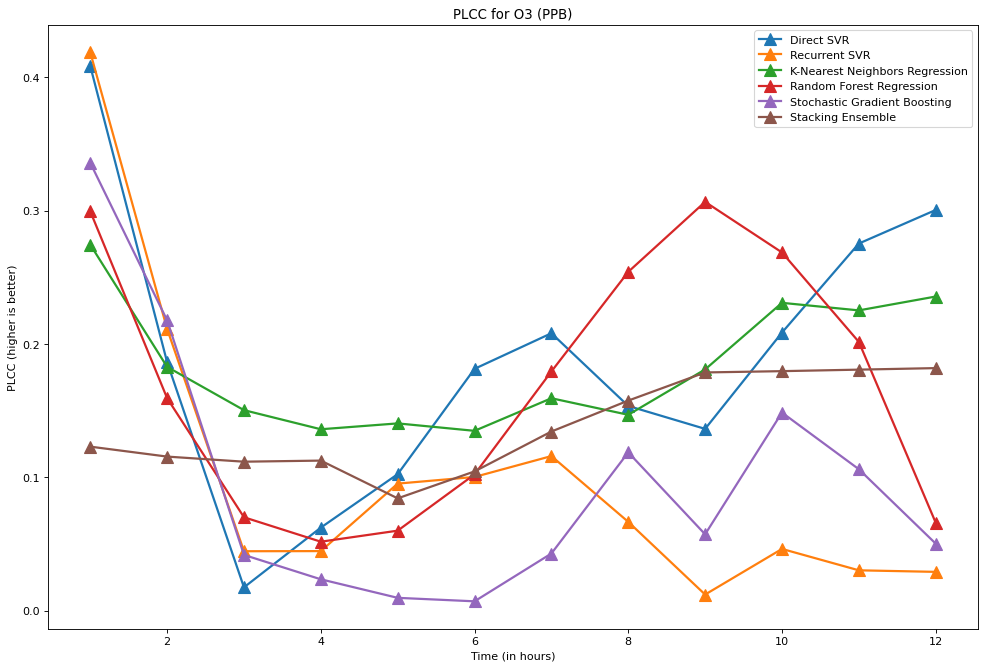

In [156]:
apc_name = apc_names[3]
plot_plcc(apc_name)

## RMSE

In [157]:
apc_names = list(rmse_dict.keys())

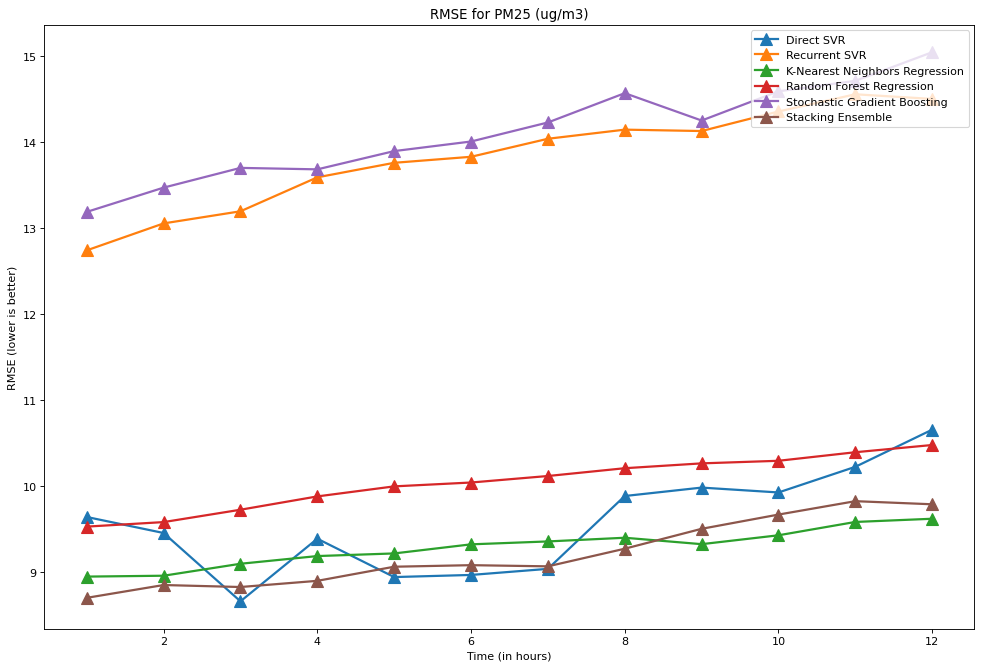

In [158]:
apc_name = apc_names[0]
plot_rmse(apc_name)

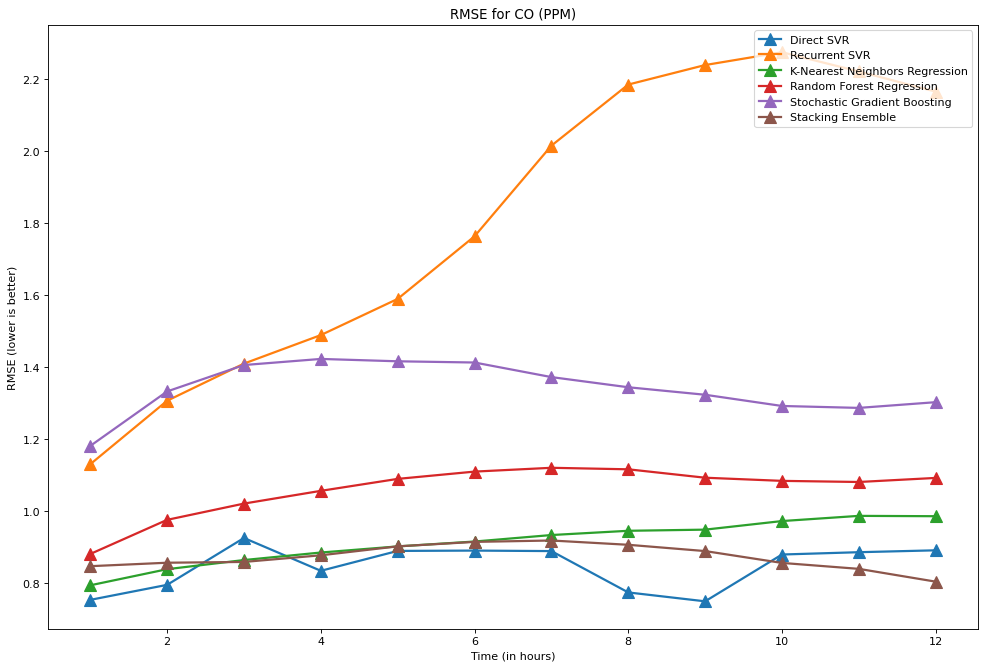

In [159]:
apc_name = apc_names[1]
plot_rmse(apc_name)

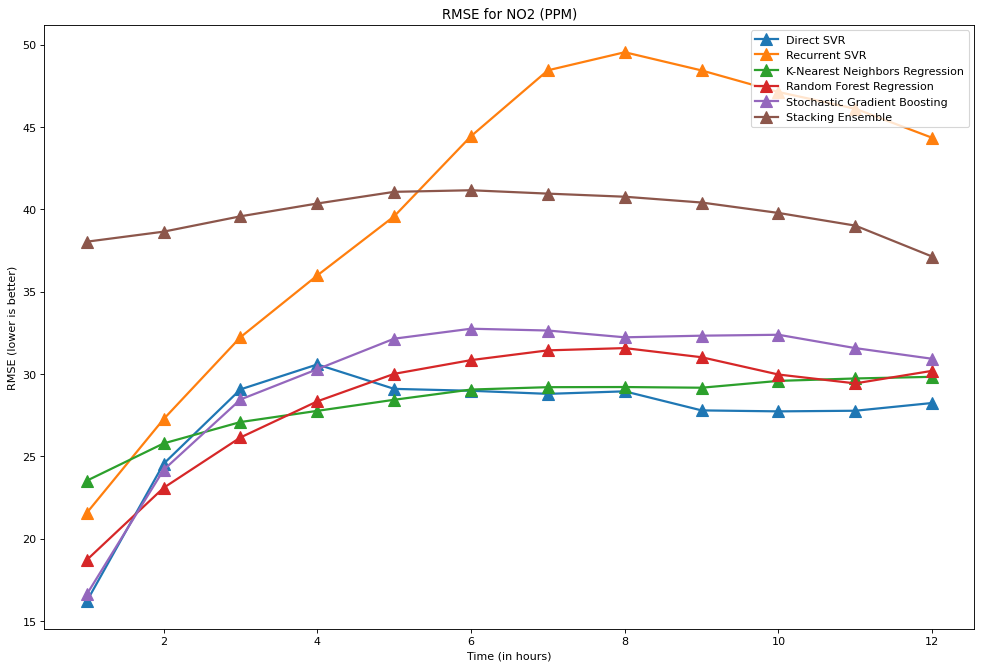

In [160]:
apc_name = apc_names[2]
plot_rmse(apc_name)

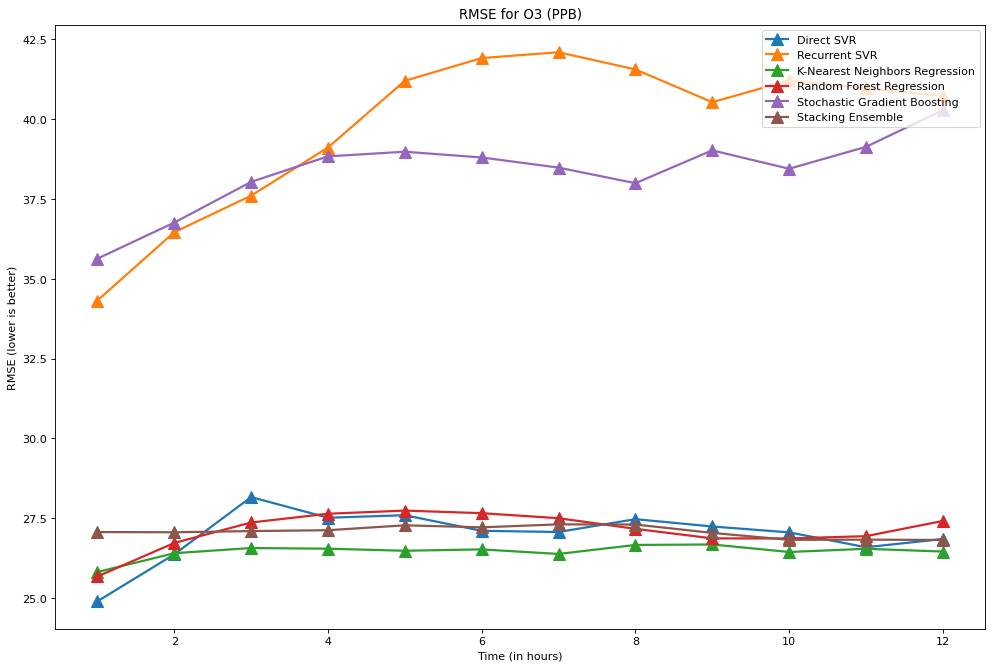

In [161]:
apc_name = apc_names[3]
plot_rmse(apc_name)